# Exploring the Intersection of Race/Ethnicity, COVID-19, and Breast Cancer

In [1]:
#!pip install pyreadr

import pyreadr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import chi2_contingency

raw_data = pyreadr.read_r('48_-_breast_cancer_data.RData')['out']
raw_data.to_csv('dataset')

raw_data

,der_ordinal_v1a,der_days_fu,der_deadbinary,der_dead30,der_mv,der_ICU,der_hosp,der_AKI_comp,der_MOF_comp,der_coinfection_any,...,der_txline,der_heme,der_metastatic,der_met_bone,der_met_liver,der_met_lung_v2,der_age_trunc,der_CV_event_v2,der_pulm_event,der_GI_event
0,0,30.0,No,No,No,No,No,No,No,No,...,First line,0,Missing/Unknown,NaN,NaN,NaN,58.0,No,Yes,No
1,0,180.0,No,No,No,No,No,No,No,NaN,...,Non-curative NOS,0,Yes,Yes,No,No,67.0,No,No,No
2,1,10.5,No,No,No,No,Yes,No,No,NaN,...,First line,0,No,No,No,No,42.0,No,No,No
3,1,180.0,No,No,No,No,Yes,No,No,No,...,Untreated in last 12 months,0,Yes,Yes,Yes,No,49.0,No,Yes,No
4,0,180.0,No,No,No,No,No,No,No,No,...,First line,0,No,No,No,No,47.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0,180.0,No,No,No,No,No,No,No,No,...,First line,0,No,No,No,No,58.0,No,No,No
1379,1,30.0,No,No,No,No,Yes,Yes,No,No,...,Curative NOS,0,Yes,No,No,No,73.0,No,No,No
1380,0,135.0,No,No,No,No,No,No,No,No,...,Untreated in last 12 months,0,No,No,No,No,60.0,No,No,No
1381,1,10.5,No,No,No,No,Yes,No,No,No,...,Untreated in last 12 months,0,No,No,No,No,60.0,No,Yes,No


In [2]:
raw_data.columns

Index(['der_ordinal_v1a', 'der_days_fu', 'der_deadbinary', 'der_dead30',
       'der_mv', 'der_ICU', 'der_hosp', 'der_AKI_comp', 'der_MOF_comp',
       'der_coinfection_any', 'der_sepsis_comp', 'der_bleeding_comp',
       'der_rem', 'der_hcq', 'der_steroids_c19', 'der_other_tx_c19_v2',
       'der_o2_ever', 'der_race_v2', 'der_insurance', 'der_smoking2',
       'der_obesity', 'der_card', 'der_pulm', 'der_renal', 'der_dm2',
       'der_ecogcat2', 'der_breast_biomarkers', 'der_cancer_status_v4',
       'der_cancer_tx_timing_v2', 'der_cancertr_none', 'der_any_cyto',
       'der_any_targeted', 'der_her2_3m', 'der_cdk46i_3m', 'der_other_3m',
       'der_any_endo', 'der_any_immuno', 'der_any_local', 'der_any_other',
       'der_region_v2', 'urban_rural', 'der_site_type',
       'severity_of_covid_19_v2', 'der_tr_intent', 'der_txline', 'der_heme',
       'der_metastatic', 'der_met_bone', 'der_met_liver', 'der_met_lung_v2',
       'der_age_trunc', 'der_CV_event_v2', 'der_pulm_event', 'der_GI_e

In [3]:
clean_data = pd.DataFrame({
    'Race': raw_data['der_race_v2'],
    'Cancer Status': raw_data['der_cancer_status_v4'],
    'COVID-19 Severity': raw_data['severity_of_covid_19_v2'],
    'Death (Binary)': raw_data['der_deadbinary'],
    'Death (30days)':raw_data['der_dead30'],
    'Mechanical Ventilation': raw_data['der_mv'],
    'ICU Admission': raw_data['der_ICU'],
    'Hospitalization': raw_data['der_hosp'],
    'Cardiovascular Event': raw_data['der_CV_event_v2'],
    'Pulmonary Event': raw_data['der_pulm_event'],
    'GI Event': raw_data['der_GI_event'],
    'Bleeding Complication': raw_data['der_bleeding_comp'],
    'Acute Kidney Injury': raw_data['der_AKI_comp'],
    'Multisystem Organ Failure': raw_data['der_MOF_comp'],
    'Coinfection': raw_data['der_coinfection_any'],
    'Remdesivir Treatment': raw_data['der_rem'],
    'Hydroxychloroquine Treatment': raw_data['der_hcq'],
    'Steroids Treatment': raw_data['der_steroids_c19'],
    'Other COVID-19 Treatment': raw_data['der_other_tx_c19_v2']})


clean_data

,Race,Cancer Status,COVID-19 Severity,Death (Binary),Death (30days),Mechanical Ventilation,ICU Admission,Hospitalization,Cardiovascular Event,Pulmonary Event,GI Event,Bleeding Complication,Acute Kidney Injury,Multisystem Organ Failure,Coinfection,Remdesivir Treatment,Hydroxychloroquine Treatment,Steroids Treatment,Other COVID-19 Treatment
0,Non-Hispanic White,Active and responding,Severe,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,No,No
1,Hispanic,Active and stable,Mild,No,No,No,No,No,No,No,No,No,No,No,NaN,No,No,No,Yes
2,Hispanic,NaN,Moderate,No,No,No,No,Yes,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN
3,Other,Unknown,Moderate,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No
4,Hispanic,Active and responding,Mild,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,Other,Active and responding,Mild,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1379,Non-Hispanic Black,Active and responding,Moderate,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No
1380,Non-Hispanic White,"Remission or no evidence of disease, >5 years",Mild,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1381,Non-Hispanic Black,Unknown,Moderate,No,No,No,No,Yes,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes


In [4]:
clean_data.columns


Index(['Race', 'Cancer Status', 'COVID-19 Severity', 'Death (Binary)',
       'Death (30days)', 'Mechanical Ventilation', 'ICU Admission',
       'Hospitalization', 'Cardiovascular Event', 'Pulmonary Event',
       'GI Event', 'Bleeding Complication', 'Acute Kidney Injury',
       'Multisystem Organ Failure', 'Coinfection', 'Remdesivir Treatment',
       'Hydroxychloroquine Treatment', 'Steroids Treatment',
       'Other COVID-19 Treatment'],
      dtype='object')

In [5]:
race_counts = clean_data['Race'].dropna()
race_counts = clean_data['Race'].value_counts()
race_counts

Race
Non-Hispanic White    736
Non-Hispanic Black    289
Hispanic              235
Other                  78
Non-Hispanic AAPI      45
Name: count, dtype: int64

Text(0.5, 1.0, 'Race Distribution in the study')

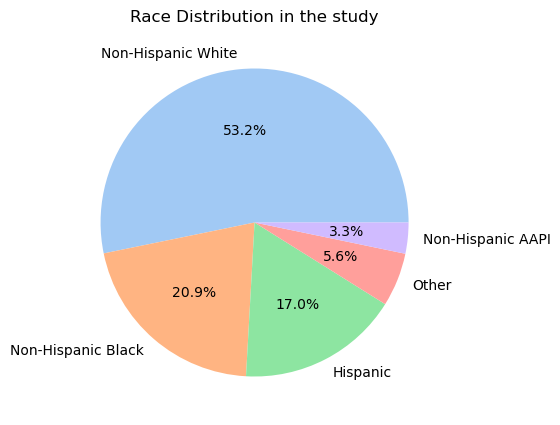

In [6]:
palette = sns.color_palette("pastel", 5)
plt.figure(figsize=(5, 5))
plt.pie(race_counts, labels=race_counts.index, colors=palette, autopct='%1.1f%%')
plt.title('Race Distribution in the study')


In [43]:
#merge new df with percentage list on it
race_counts_df = pd.DataFrame({'Count': [235, 45, 289, 736, 78]}, 
                              index=['Hispanic', 'Non-Hispanic AAPI', 'Non-Hispanic Black', 'Non-Hispanic White','Other'])

race_percentage = (race_counts_df / race_counts_df.sum() * 100).round(2).astype(str) + '%'
race_counts_df['Percentage'] = race_percentage
race_counts_df



,Count,Percentage
Hispanic,235,16.99%
Non-Hispanic AAPI,45,3.25%
Non-Hispanic Black,289,20.9%
Non-Hispanic White,736,53.22%
Other,78,5.64%


## Race/Ethnic Distribution and COVID-19

In [44]:
covid_severity = pd.DataFrame(clean_data[['Race','COVID-19 Severity']])
covid_severity

,Race,COVID-19 Severity
0,Non-Hispanic White,Severe
1,Hispanic,Mild
2,Hispanic,Moderate
3,Other,Moderate
4,Hispanic,Mild
...,...,...
1378,Other,Mild
1379,Non-Hispanic Black,Moderate
1380,Non-Hispanic White,Mild
1381,Non-Hispanic Black,Moderate


In [45]:
# covid_data in percentage
covid_data_drop = covid_severity.dropna(subset=['COVID-19 Severity'])
covid_data_clean = covid_data_drop.loc[(clean_data['COVID-19 Severity'] != 'Unknown'), :]

# covid_data = covid_data_clean.set_index(['Race'])

severity_counts = covid_data.groupby(['Race', 'COVID-19 Severity']).size().unstack(fill_value=0)
print(severity_counts)


COVID-19 Severity   Mild  Moderate  Severe
Race                                      
Hispanic             173        56       6
Non-Hispanic AAPI     28        14       3
Non-Hispanic Black   177        97      15
Non-Hispanic White   535       174      25
Other                 50        21       7


In [46]:
covid_data_clean 

,Race,COVID-19 Severity
0,Non-Hispanic White,Severe
1,Hispanic,Mild
2,Hispanic,Moderate
3,Other,Moderate
4,Hispanic,Mild
...,...,...
1378,Other,Mild
1379,Non-Hispanic Black,Moderate
1380,Non-Hispanic White,Mild
1381,Non-Hispanic Black,Moderate


In [47]:
covid_data_clean.columns

Index(['Race', 'COVID-19 Severity'], dtype='object')

In [48]:
crosstabResult = pd.crosstab(index = covid_data_clean ['Race'], columns = covid_data_clean ['COVID-19 Severity'])
print(crosstabResult)

COVID-19 Severity   Mild  Moderate  Severe
Race                                      
Hispanic             173        56       6
Non-Hispanic AAPI     28        14       3
Non-Hispanic Black   177        97      15
Non-Hispanic White   535       174      25
Other                 50        21       7


In [49]:
chiSq = chi2_contingency(crosstabResult)
print(f'The p_value of the Chi Square is {chiSq[1]}')

The p_value of the Chi Square is 0.004365424803990782


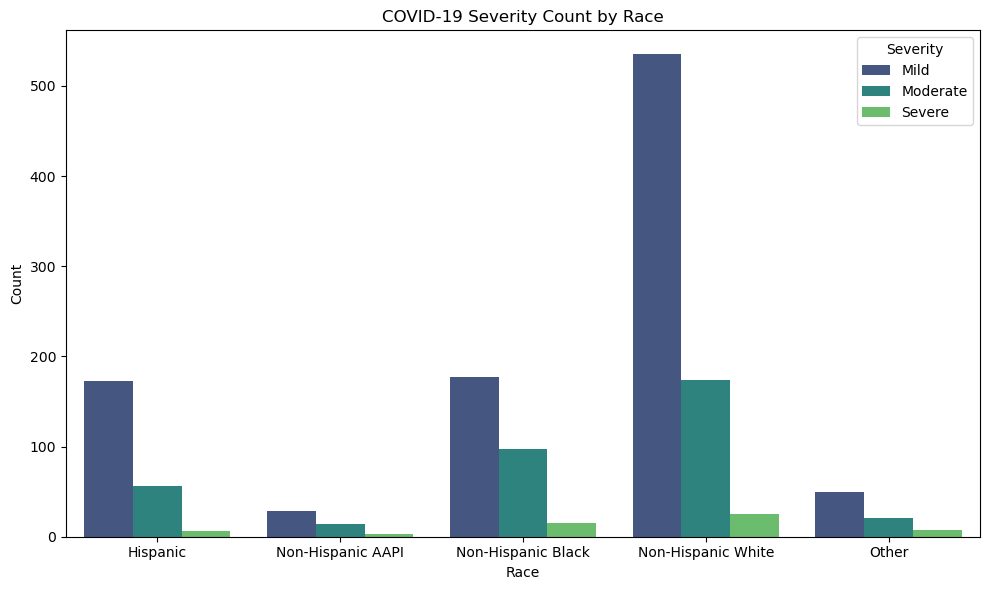

In [50]:
#chatgpt been used for learning Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Race', hue='COVID-19 Severity', data=covid_severity, palette='viridis')
plt.legend(title='Severity')
plt.title('COVID-19 Severity Count by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.tight_layout()

In [51]:
#however, we cant really see thing from this chart because the number of sample are very different
#so we have to change them to percentage and get their weighted average

In [52]:
normalized_severity = (severity_counts.div(severity_counts.sum(axis=1), axis=0) * 100).round(2).astype(str) + '%'
normalized_severity

COVID-19 Severity,Mild,Moderate,Severe
Race,,,
Hispanic,73.62%,23.83%,2.55%
Non-Hispanic AAPI,62.22%,31.11%,6.67%
Non-Hispanic Black,61.25%,33.56%,5.19%
Non-Hispanic White,72.89%,23.71%,3.41%
Other,64.1%,26.92%,8.97%


In [53]:
race_and_severity = pd.merge(race_counts_df, normalized_severity, left_index=True,right_index=True)

race_and_severity.rename(columns={'Count': 'Race Count','Percentage': 'Race Percentage',
                                  'Mild': 'COVID-19 Severity(Mild)',
                                  'Moderate': 'COVID-19 Severity(Moderate)',
                                  'Severe': 'COVID-19 Severity(Severe)'}, inplace=True)
race_and_severity

,Race Count,Race Percentage,COVID-19 Severity(Mild),COVID-19 Severity(Moderate),COVID-19 Severity(Severe)
Hispanic,235,16.99%,73.62%,23.83%,2.55%
Non-Hispanic AAPI,45,3.25%,62.22%,31.11%,6.67%
Non-Hispanic Black,289,20.9%,61.25%,33.56%,5.19%
Non-Hispanic White,736,53.22%,72.89%,23.71%,3.41%
Other,78,5.64%,64.1%,26.92%,8.97%


In [54]:
race_and_severity_plot = race_and_severity[[ 'COVID-19 Severity(Mild)', 'COVID-19 Severity(Moderate)',
                                            'COVID-19 Severity(Severe)']]
race_and_severity_plot

,COVID-19 Severity(Mild),COVID-19 Severity(Moderate),COVID-19 Severity(Severe)
Hispanic,73.62%,23.83%,2.55%
Non-Hispanic AAPI,62.22%,31.11%,6.67%
Non-Hispanic Black,61.25%,33.56%,5.19%
Non-Hispanic White,72.89%,23.71%,3.41%
Other,64.1%,26.92%,8.97%


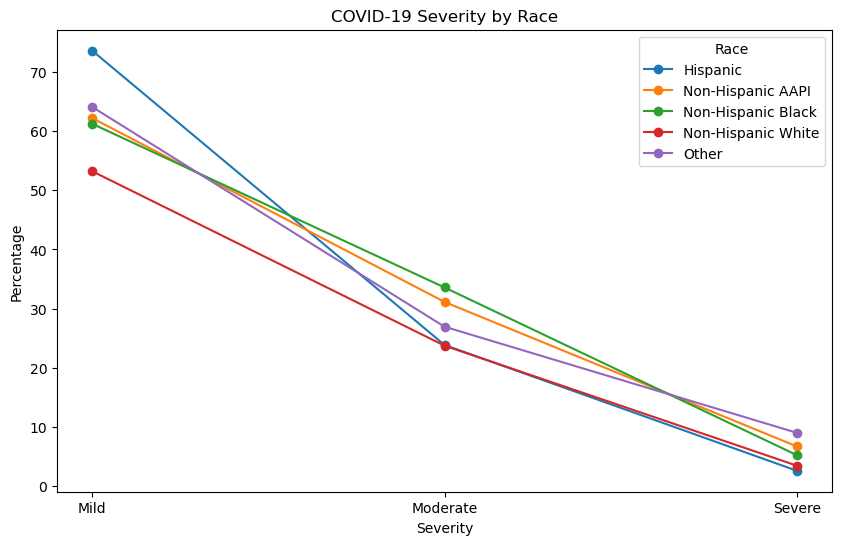

In [55]:
#chatgpt help me code these casue I failed to use subplot

data = {
    'Race': ['Hispanic', 'Non-Hispanic AAPI', 'Non-Hispanic Black', 'Non-Hispanic White', 'Other'],
    'Mild': [73.62, 62.22, 61.25, 53.22, 64.1],
    'Moderate': [23.83, 31.11, 33.56, 23.71, 26.92],
    'Severe': [2.55, 6.67, 5.19, 3.41, 8.97]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

for index, row in df.iterrows():
    plt.plot(row.index[1:], row.values[1:], marker='o', label=row['Race'])


plt.title('COVID-19 Severity by Race')
plt.xlabel('Severity')
plt.ylabel('Percentage')
plt.legend(title='Race', loc='best')



Text(75.74999999999999, 0.5, 'Race')

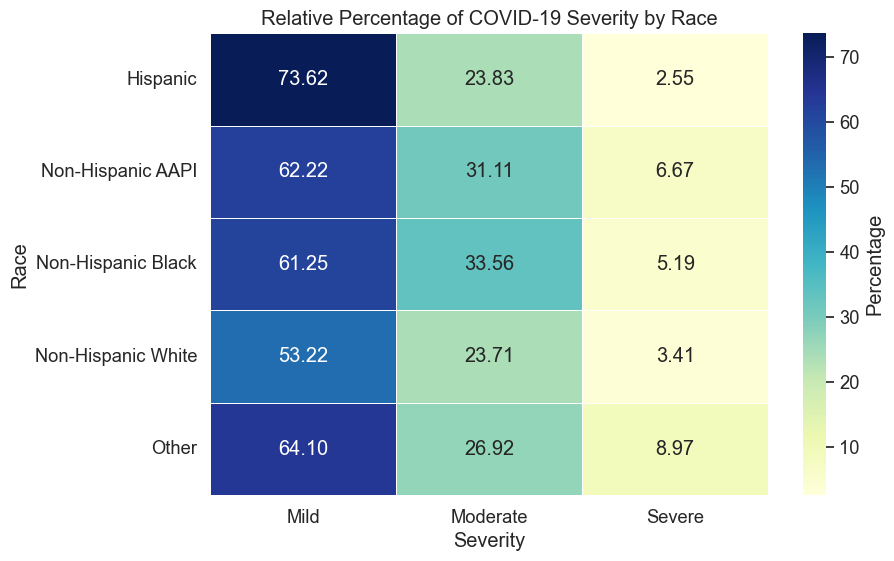

In [56]:
plt.figure(figsize=(9, 6))
sns.set(font_scale=1.2)

sns.heatmap(df.set_index('Race'), annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Percentage'})

plt.title('Relative Percentage of COVID-19 Severity by Race')
plt.xlabel('Severity')
plt.ylabel('Race')



## Race/Ethnic Distribution and Breast Cancer

In [57]:
cancer_severity = pd.DataFrame(clean_data[['Race','Cancer Status']])
cancer_severity = cancer_severity.dropna(subset=['Cancer Status'])
# cancer_severity = cancer_severity.set_index(['Race/Ethnicity'])
cancer_severity

,Race,Cancer Status
0,Non-Hispanic White,Active and responding
1,Hispanic,Active and stable
3,Other,Unknown
4,Hispanic,Active and responding
5,Non-Hispanic White,"Remission or no evidence of disease, <5 years"
...,...,...
1378,Other,Active and responding
1379,Non-Hispanic Black,Active and responding
1380,Non-Hispanic White,"Remission or no evidence of disease, >5 years"
1381,Non-Hispanic Black,Unknown


In [38]:
cancer_status_sum = cancer_severity.groupby(['Race', 'Cancer Status']).size().reset_index(name='Count')
cancer_status_sum = pd.DataFrame(cancer_status_sum)
cancer_status_sum = cancer_status_sum.loc[cancer_status_sum['Cancer Status'] != 'Unknown',:]

cancer_status_sum

,Race,Cancer Status,Count
0,Hispanic,Active and progressing,20
1,Hispanic,Active and responding,56
2,Hispanic,Active and stable,35
3,Hispanic,"Remission or no evidence of disease, <5 years",77
4,Hispanic,"Remission or no evidence of disease, >5 years",23
6,Non-Hispanic AAPI,Active and progressing,6
7,Non-Hispanic AAPI,Active and responding,3
8,Non-Hispanic AAPI,Active and stable,10
9,Non-Hispanic AAPI,"Remission or no evidence of disease, <5 years",11
10,Non-Hispanic AAPI,"Remission or no evidence of disease, >5 years",9


In [39]:
cancer_status_sum.columns

Index(['Race', 'Cancer Status', 'Count'], dtype='object')

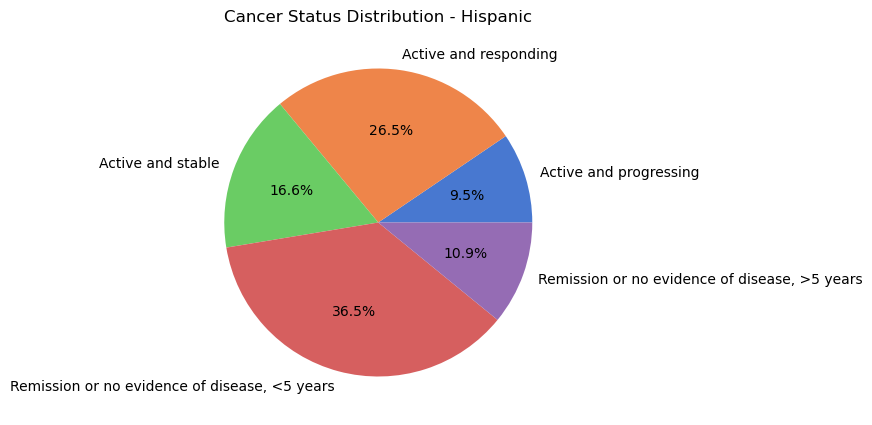

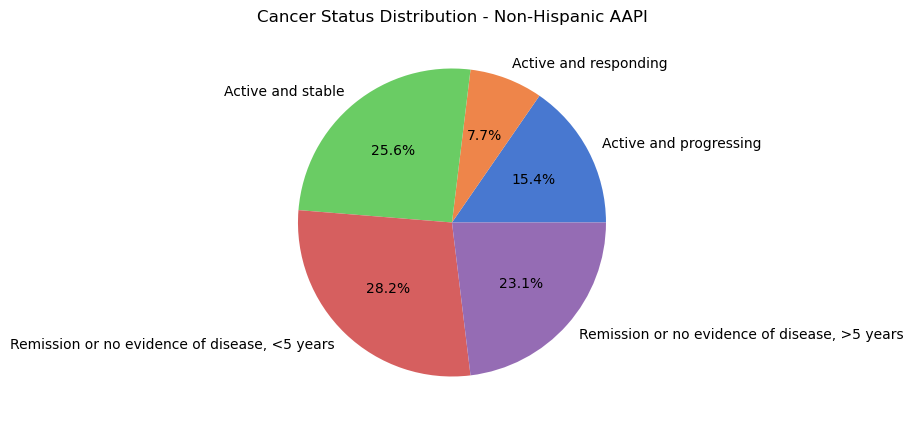

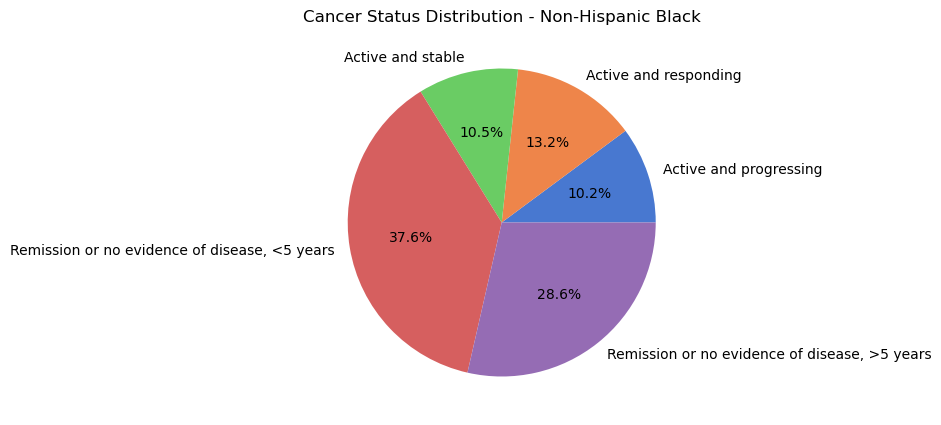

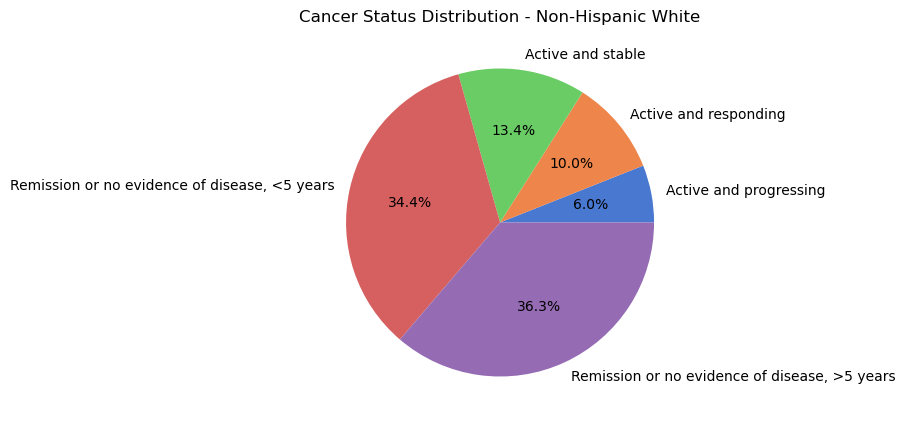

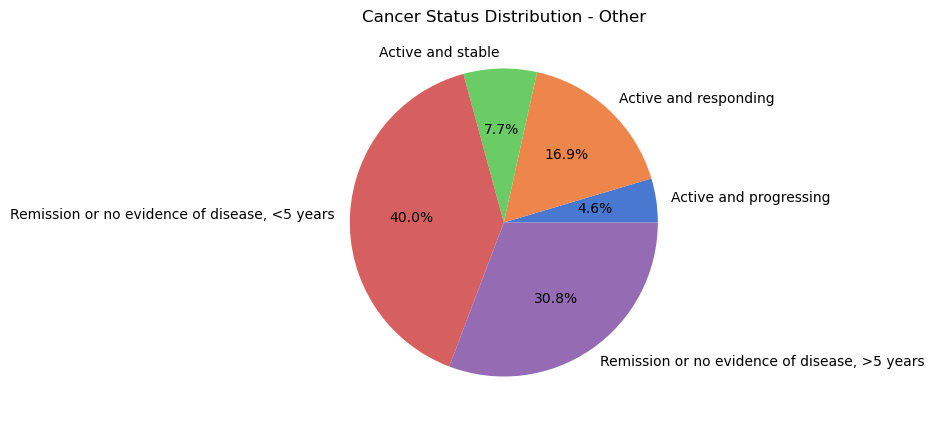

In [41]:
# each ethnicity =  race 
# seaborn palette: "deep","muted","bright","dark" ,"pastel" 

races = cancer_status_sum['Race'].unique()
palette = sns.color_palette("muted", 5)

for race in races:

    race_data = cancer_status_sum[cancer_status_sum['Race'] == race]
    plt.figure(figsize=(5, 5))
    plt.pie(race_data['Count'], labels=race_data['Cancer Status'], autopct='%1.1f%%',colors= palette)
    plt.title(f'Cancer Status Distribution - {race}')


In [42]:
table = pd.crosstab(cancer_severity['Race'], cancer_severity['Cancer Status'])

chi2_cancer_severity, p_cancer_severity, dof, expected = chi2_contingency(table)
print(f"Chi-squared value is {chi2_cancer_severity} and the p-value is {p_cancer_severity}")

Chi-squared value is 98.05191807290167 and the p-value is 2.8064344261338783e-12
